In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json

import importlib
import lib.ting_utils
importlib.reload(lib.ting_utils)
from lib.ting_utils import getTingMeasurementsFromFile



In [3]:
df = getTingMeasurementsFromFile('csvs/json_measurements/2020-03-06.json')

In [4]:
df_1 = df[(df['relay']==df.loc[0]['relay']) & (df['rtt'] > 0)]

In [5]:
df_1

,date,time,anchor,relay,rtt
0,2020-03-06,12:32:00.086718,99339F3E68BCCC1391BF14C821D80766FE0C5956,3DCA95587F917F3F212B598731B97BDB85BFEE92,57.765485
1,2020-03-06,12:32:22.055969,99339F3E68BCCC1391BF14C821D80766FE0C5956,3DCA95587F917F3F212B598731B97BDB85BFEE92,56.701660
2,2020-03-06,12:32:43.788800,99339F3E68BCCC1391BF14C821D80766FE0C5956,3DCA95587F917F3F212B598731B97BDB85BFEE92,56.005000
3,2020-03-06,12:33:05.401925,99339F3E68BCCC1391BF14C821D80766FE0C5956,3DCA95587F917F3F212B598731B97BDB85BFEE92,48.151975
4,2020-03-06,12:33:26.886681,99339F3E68BCCC1391BF14C821D80766FE0C5956,3DCA95587F917F3F212B598731B97BDB85BFEE92,59.939980
...,...,...,...,...,...
473,2020-03-06,15:30:12.804828,99339F3E68BCCC1391BF14C821D80766FE0C5956,3DCA95587F917F3F212B598731B97BDB85BFEE92,71.804635
474,2020-03-06,15:30:38.328957,99339F3E68BCCC1391BF14C821D80766FE0C5956,3DCA95587F917F3F212B598731B97BDB85BFEE92,72.561620
475,2020-03-06,15:31:01.473394,99339F3E68BCCC1391BF14C821D80766FE0C5956,3DCA95587F917F3F212B598731B97BDB85BFEE92,61.307670
476,2020-03-06,15:31:27.379959,99339F3E68BCCC1391BF14C821D80766FE0C5956,3DCA95587F917F3F212B598731B97BDB85BFEE92,103.144400


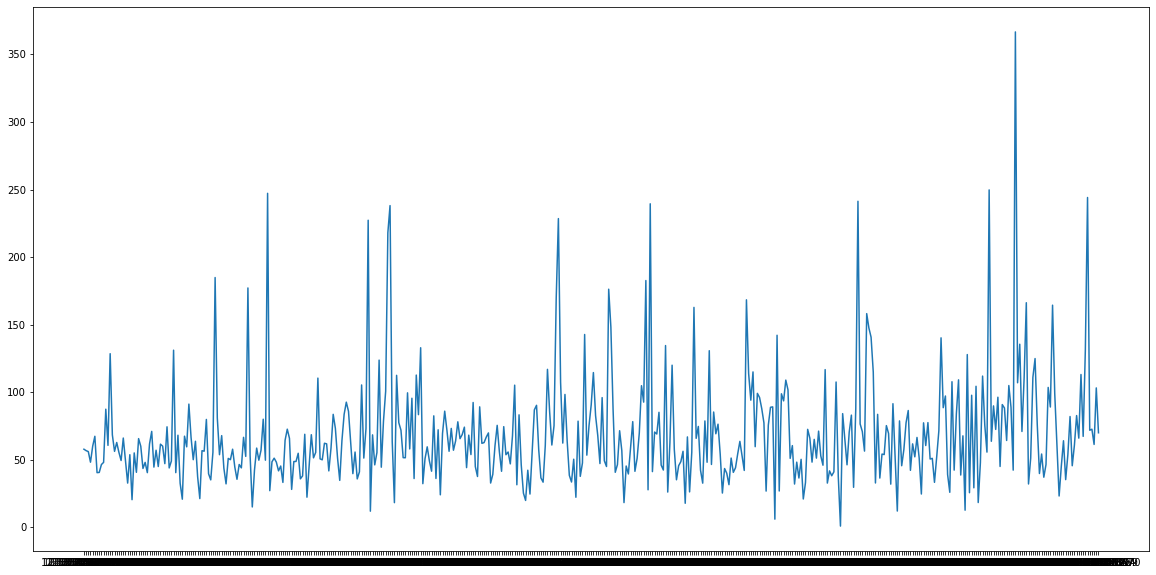

In [6]:
plt.figure(figsize=(20,10))
plt.plot(df_1['time'], df_1['rtt'])

In [7]:
import numpy as np
from scipy.signal import butter,filtfilt

def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

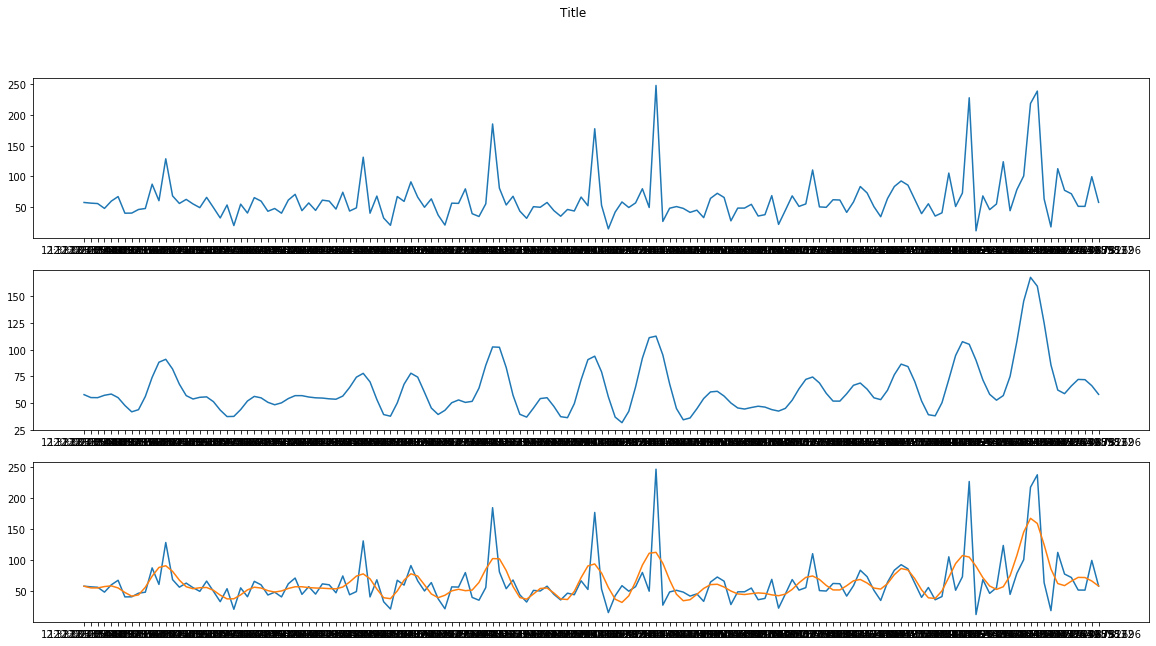

In [22]:
# Filter requirements.
#T = 5.0         # Sample Period
fs = 3          # sample rate, Hz
cutoff = 0.5      # desired cutoff frequency of the filter, Hz
nyq = 0.5 * fs  # Nyquist Frequency
order = 5      # sin wave can be approx represented as quadratic
#n = int(T * fs) # total number of samples

# CUSTOM
data = df_1['rtt'].iloc[:150]
x = df_1['time'].iloc[:150]
# data = df_1['rtt'].iloc[:150]
# x = df_1['time'].iloc[:150]

# Get signal
y = butter_lowpass_filter(data, cutoff, fs, order)

# Plot
fig, axs = plt.subplots(3, figsize=(20,10))
fig.suptitle('Title')
axs[0].plot(x, data)   # 1
#axs[0].set_xticks(np.arange(min(x), max(x), 10))

axs[1].plot(x, y)      # 2
#axs[1].set_xticks(np.arange(min(x), max(x), 10))

axs[2].plot(x, data)   # 3
axs[2].plot(x, y)      # 3
#axs[2].set_xticks(np.arange(min(x), max(x), 10))


In [23]:
df_temp = pd.DataFrame()
df_temp['data'] = y
df_temp['time'] = x
#df_temp.to_csv('csvs/1hour_filtered_3DCA95.csv', index=False)